In [53]:
path='A:/CV_poker/text.txt'
open(path).readline()

'Hello World!'

In [54]:
# path='A:/CV_poker/test.h5'

In [55]:
path='A:/CV_poker/train.h5'

In [56]:
features = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS']

In [57]:
# Let's keep a map of poker hand class id to class name
# There are exactly 10 type of poker hands

poker_hand_types = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

hand_name = {
    0: 'Nothing in hand',
    1: 'One pair',
    2: 'Two pairs',
    3: 'Three of a kind',
    4: 'Straight',
    5: 'Flush',
    6: 'Full house',
    7: 'Four of a kind',
    8: 'Straight flush',
    9: 'Royal flush',
}

In [58]:
!pip install treys
from treys import Card
from treys import Evaluator

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


You should consider upgrading via the 'C:\Users\jdtyl\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [59]:
!pip install h5py

from __future__ import print_function # we want to enable Python 3
import h5py
import numpy as np

# This is how you open an HDF5 file
f = h5py.File(path, 'r')

# We will collect all the images in one long Python list
images = []

# We will collect all classes in the following list
y_train = []

# Poker hands in text form
hands = []
print(type(f))
# Our HDF5 file has a special key for the number of images
num_images = f.get('num_images')[()]
for i in range(num_images):
    cls_key = 'cls_' + str(i)
    img_key = 'img_' + str(i)
    hnd_key = 'hnd_' + str(i)
    
    # This is the poker hand class
    cls = int(np.array(f.get(cls_key)))
    y_train.append(cls)
    
    # This is image i
    img = np.array(f.get(img_key))
    images.append(img)
    
    # This is the poker hand text form
    h = np.array(f.get(hnd_key))
    hands.append(h)

# Do not forget to close the HDF5 file!
f.close()

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


You should consider upgrading via the 'C:\Users\jdtyl\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


<class 'h5py._hl.files.File'>


In [60]:
!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def draw_hand(i):
    print("Image id:", i)
    print("Features:", hands[i])
    c = y_train[i]
    img = images[i]
    print("Class: %d (%s)" % (c, hand_name[c]))
    plt.title(hand_name[c], fontsize=18, fontweight='bold', y=1.02)
    ticks=[0,32,64,96,128,160,192]
    plt.xticks(ticks, fontsize=12)
    plt.yticks(ticks, fontsize=12)
    plt.imshow(img, cmap='jet')
    plt.show()

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


You should consider upgrading via the 'C:\Users\jdtyl\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Image id: 0
Features: [1 2 1 4 1 5 1 3 1 6]
Class: 8 (Straight flush)


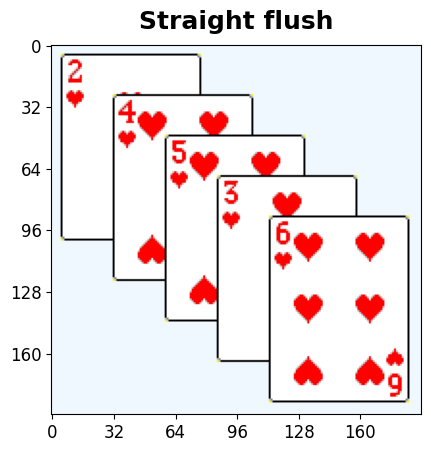

In [61]:
draw_hand(0)

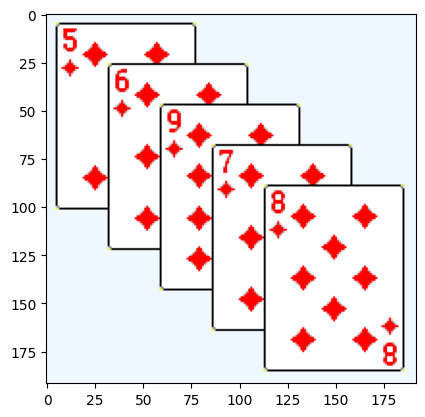

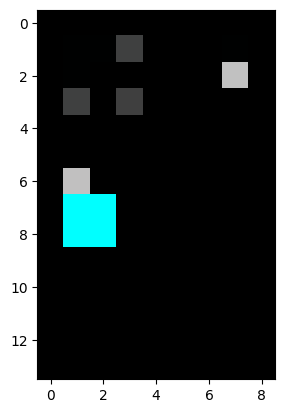

9.986772486772487


In [62]:
orank = [8,7]
osuit = [7,22]
drank = [9,14]
dsuit = [11,15]
offset = [27,21]


oimg = images[3]
plt.imshow(oimg, cmap='jet')


img = oimg
plt.imshow(img, cmap='jet')
plt.show()

rank_samp = []
suit_samp = []

for n in range(5):
    x=orank[0]+n*offset[0]
    y=orank[1]+n*offset[1]
    xp=x+drank[0]
    yp=y+drank[1]
    img = oimg[y:yp,x:xp]
#     plt.imshow(img, cmap='jet')
#     plt.show()
    rank_samp.append(img)
    
    x=osuit[0]+n*offset[0]
    y=osuit[1]+n*offset[1]
    xp=x+dsuit[0]
    yp=y+dsuit[1]
    img = oimg[y:yp,x:xp]
#     plt.imshow(img, cmap='jet')
#     plt.show()
    suit_samp.append(img)
    
diff = rank_samp[0]-rank_samp[1]
plt.imshow(diff, cmap='jet')
plt.show()
print(np.mean(diff))

Extraction Code

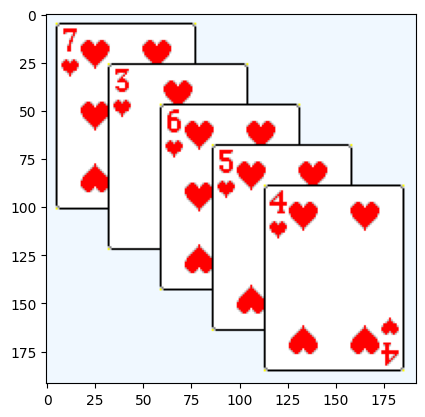

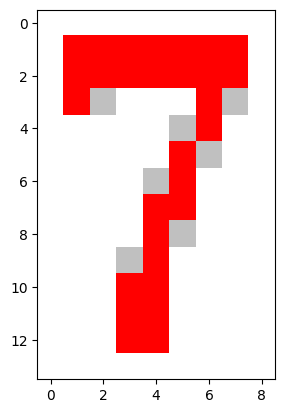

In [63]:
oimg = images[14]

img = oimg
plt.imshow(img, cmap='jet')
plt.show()

n=0
x=orank[0]+n*offset[0]
y=orank[1]+n*offset[1]
xp=x+drank[0]
yp=y+drank[1]
img = oimg[y:yp,x:xp]


plt.imshow(img, cmap='jet')
plt.show()

# from PIL import Image
# im = Image.fromarray(img)
# im.save('A:/CV_poker/templates/b_six.png')

Blurring

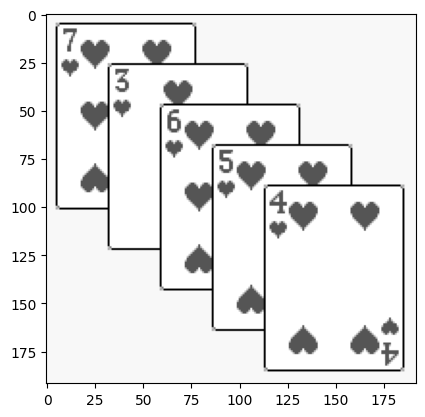

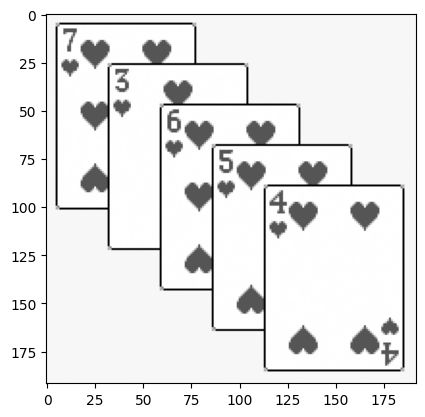

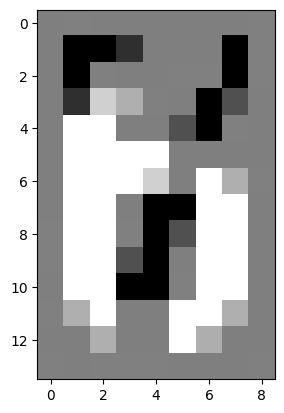

23.93599210026147


In [64]:
mean = 0
var = 0.08
sigma = var ** 0.5
gaussian = np.random.normal(mean, sigma, (192, 192)) 
gimg=np.mean(oimg,2)+gaussian



img = np.mean(oimg,2)
plt.imshow(img, cmap='gray')
plt.show()


img = gimg
plt.imshow(img, cmap='gray')
plt.show()




rank_samp = []
suit_samp = []

n=0
x=orank[0]+n*offset[0]
y=orank[1]+n*offset[1]
xp=x+drank[0]
yp=y+drank[1]
img = np.mean(oimg,2)[y:yp,x:xp]
#     plt.imshow(img, cmap='jet')
#     plt.show()
rank_samp.append(img)

n=2
x=orank[0]+n*offset[0]
y=orank[1]+n*offset[1]
xp=x+drank[0]
yp=y+drank[1]
img = gimg[y:yp,x:xp]
#     plt.imshow(img, cmap='jet')
#     plt.show()
rank_samp.append(img)


diff = rank_samp[0]-rank_samp[1]
plt.imshow(diff, cmap='gray')
plt.show()
print(np.mean(diff))

In [79]:
!pip install opencv-python
import copy
def drawboxes2(oimg):
    orank = [8,7]
    osuit = [7,22]
    drank = [9,14]
    dsuit = [11,15]
    offset = [27,21]

    import cv2

    img=copy.copy(oimg)
    
    for n in range(5):
        x=orank[0]+n*offset[0]-1
        y=orank[1]+n*offset[1]-1
        xp=x+drank[0]+1
        yp=y+drank[1]+1
        
        # Create a Rectangle patch
        cv2.rectangle(img,(x,y),(xp,yp),(255,0,0),1)

        x=osuit[0]+n*offset[0]-1
        y=osuit[1]+n*offset[1]-1
        xp=x+dsuit[0]+1
        yp=y+dsuit[1]+1
        
        # Create a Rectangle patch
        cv2.rectangle(img,(x,y),(xp,yp),(255,0,0),1)
    
    return img

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


You should consider upgrading via the 'C:\Users\jdtyl\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [66]:
def drawboxes(oimg):
    orank = [8,7]
    osuit = [7,22]
    drank = [9,14]
    dsuit = [11,15]
    offset = [27,21]

    import matplotlib.pyplot as plt
    import matplotlib.patches as patches

    # Create figure and axes
    fig, ax = plt.subplots()
    
    # Display the image
    ax.imshow(oimg)
    
    for n in range(5):
        x=orank[0]+n*offset[0]
        y=orank[1]+n*offset[1]
        xp=drank[0]
        yp=drank[1]
        
        # Create a Rectangle patch
        rect = patches.Rectangle((x, y), xp, yp, linewidth=1, edgecolor='r', facecolor='none')
        
        # Add the patch to the Axes
        ax.add_patch(rect)

        x=osuit[0]+n*offset[0]
        y=osuit[1]+n*offset[1]
        xp=dsuit[0]
        yp=dsuit[1]

    
        # Create a Rectangle patch
        rect = patches.Rectangle((x, y), xp, yp, linewidth=1, edgecolor='r', facecolor='none')
        
        # Add the patch to the Axes
        ax.add_patch(rect)
    
    plt.show()

In [77]:
def gethand(oimg):
    orank = [8,7]
    osuit = [7,22]
    drank = [9,14]
    dsuit = [11,15]
    offset = [27,21]

    filepath='A:/CV_poker/templates/'
    fsuit=['heart.png','spade.png','diamond.png','club.png']
    fred=['r_ace.png','r_two.png','r_three.png','r_four.png','r_five.png','r_six.png','r_seven.png','r_eight.png','r_nine.png','r_ten.png','r_jack.png','r_queen.png','r_king.png']
    fblack=['b_ace.png','b_two.png','b_three.png','b_four.png','b_five.png','b_six.png','b_seven.png','b_eight.png','b_nine.png','b_ten.png','b_jack.png','b_queen.png','b_king.png']
    
    ranks=[]
    suits=[]

    for n in range(5):
        x=orank[0]+n*offset[0]
        y=orank[1]+n*offset[1]
        xp=x+drank[0]
        yp=y+drank[1]
        rimg = oimg[y:yp,x:xp]

        x=osuit[0]+n*offset[0]
        y=osuit[1]+n*offset[1]
        xp=x+dsuit[0]
        yp=y+dsuit[1]
        simg = oimg[y:yp,x:xp]

        mindiff=float('inf')
        minsuit=-1
        for i in range(0,4):
            template = (255*plt.imread(filepath+fsuit[i])).astype(int)
            diff = abs(np.mean(simg-template))
            if(diff<mindiff):
                mindiff=diff
                minsuit=i
        #     print("template:",i)
        #     print("diff:",diff)
        # print("min:",mindiff)
        # print("result:",minsuit)
        suits.append(minsuit)
        
        if(minsuit%2==0):
            frank=fred
        else:
            frank=fblack
        
        mindiff=float('inf')
        minrank=-1
        # plt.imshow(rimg, cmap='jet')
        # plt.show()

        
        for i in range(0,13):
            template = (255*plt.imread(filepath+frank[i])).astype(int)
            # plt.imshow(template, cmap='jet')
            # plt.show()
            diff = rimg-template
            # plt.imshow(diff, cmap='jet')
            # plt.show()
            diff = np.mean(abs(diff))
            if(diff<mindiff):
                mindiff=diff
                minrank=i
        #     print("template:",i)
        #     print("diff:",diff)
        # print("min:",mindiff)
        # print("result:",minrank)
        ranks.append(minrank)   
        
    return ranks,suits

In [68]:
def checkhand(ranks, suits, hand):
    correct = 0.0
    total = 5.00
    for i in range(5):
        # print(hand[2*i],hand[2*i+1],suits[i]+1,ranks[i]+1)
        if((suits[i]+1==hand[2*i])&(ranks[i]+1==hand[2*i+1])):
            correct+=1.0
    return correct/total

In [69]:
def getpokerhand(ranks,suits):
    def isflush(suits):
        suit = suits[0]
        for s in suits:
            if s!=suit:
                return False
        return True
    def isstraight(ranks):
        sorted = ranks.copy()
        sorted.sort()
        rsorted=sorted.copy()
        while(rsorted[0]==0):
            rsorted.append(rsorted.pop(0))
        # print(sorted)
        # print(rsorted)
        min= sorted[0]
        for i in range(1,5):
            min+=1
            if sorted[i]!=min:
                return False,rsorted
        return True,rsorted
    def isroyal(sorted):
        min= sorted[0]
        for i in range(1,5):
            min+=1
            if not ((sorted[i]==min)or(min==13 and sorted[i]==0)):
                return False
        if sorted[-1]==0:
            return True
        return False
    def findpairs(sorted):
        def poplike(rank,set,pool,n):
            for i in range(len(pool)):
                if pool[i]==rank:
                    set.append(pool.pop(i))
                    n-=1
                    return poplike(rank,set,pool,n)
            return n
        pool = sorted.copy()
        sets = []
        n = 5
        while n>0:
            set = []
            rank = pool.pop(0)
            set.append(rank)
            n-=1
            n=poplike(rank,set,pool,n)
            sets.append(set)
        sets.sort(key = len)
        # print(sets)
        setsorted=[]
        for s in sets:
            setsorted+=s
        return sets, setsorted
        
        

    flush = isflush(suits)
    sorted = []
    straight,sorted =  isstraight(ranks)
    rsorted = sorted
    sets,setsorted = findpairs(sorted)
    if len(sets[-1])==4:
        return 7, setsorted
    if len(sets[-1])==3:
        if len(sets[-2])==2:
            return 6, setsorted
        if flush:
            return 5, sorted
        return 3, setsorted
    if flush:
        if isroyal(sorted):
            return 9, sorted
        if straight:
            return 8, sorted
        return 5, setsorted
    if isroyal(sorted):
        return 4, sorted
    if straight:
        return 4, sorted
    if len(sets[-1])==2:
        if len(sets[-2])==2:
            return 2, setsorted
        return 1, setsorted
    return 0, sorted

In [70]:

def winrate(pokerhand, highcards, ranks, suits):
    ranklabels=['A','2','3','4','5','6','7','8','9','T','J','Q','K']
    suitlabels=['h','s','d','c']
    card0=ranklabels[ranks[0]]+suitlabels[suits[0]]
    card1=ranklabels[ranks[1]]+suitlabels[suits[1]]
    card2=ranklabels[ranks[2]]+suitlabels[suits[2]]
    card3=ranklabels[ranks[3]]+suitlabels[suits[3]]
    card4=ranklabels[ranks[4]]+suitlabels[suits[4]]
    hand=[
        Card.new(card0),
        Card.new(card1)
    ]
    board=[
        Card.new(card2),
        Card.new(card3),
        Card.new(card4)
    ]
        
    evaluator = Evaluator()
    return (1-evaluator.get_five_card_rank_percentage(evaluator.evaluate(board, hand)))
    

In [71]:
def winninghand(hands, highcards):
    maxindex=[0]
    maxhand=hands[0]
    maxhighcard=highcards[0]
    for i in range(1,len(hands)):
        hand = hands[i]
        highcard = highcards[i]
        if(hand>maxhand):
            maxindex=[i]
            maxhand=hands[i]
            maxhighcard=highcards[i]
        if(hand==maxhand):
            if(highcard==maxhighcard):
                maxindex.append(i)
            for j in range(len(highcard)-1, -1, -1):
                if((highcard[j]>maxhighcard[j])and not(maxhighcard[j]==0)):
                    maxindex=[i]
                    maxhand=hands[i]
                    maxhighcard=highcards[i]
                    break
    print(hands)
    return  maxindex
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


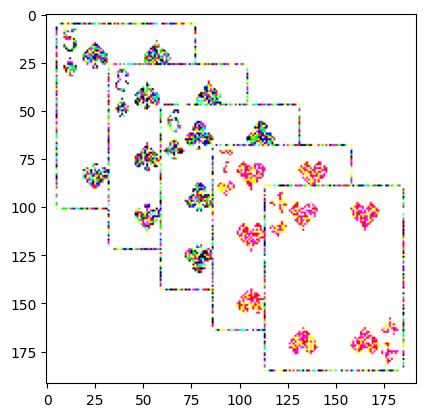

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


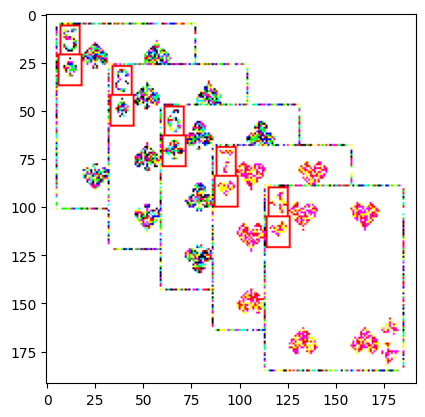

1 :  five  of  spades
2 :  eight  of  spades
3 :  six  of  clubs
4 :  seven  of  hearts
5 :  four  of  hearts
1.0
4
Higher than 78.48% of hand ranks
Class: 4 (Straight)


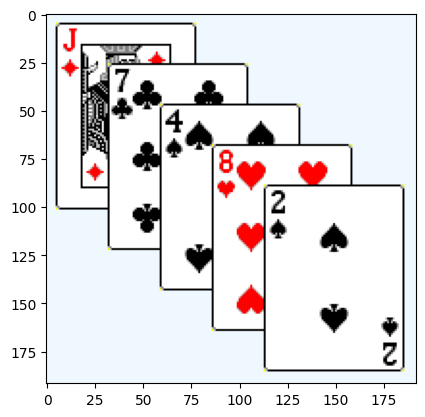

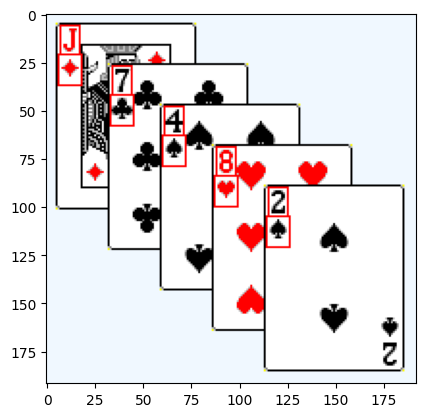

1 :  jack  of  diamonds
2 :  seven  of  clubs
3 :  four  of  spades
4 :  eight  of  hearts
5 :  two  of  spades
1.0
0
Higher than  1.97% of hand ranks
Class: 0 (Nothing in hand)
[4, 0]
[0]
[0]


In [114]:
suitnames=['hearts','spades','diamonds','clubs']
ranknames=['ace','two','three','four','five','six','seven','eight','nine','ten','jack','queen','king']

ex= 13415
ex2 = 679

pokerhands=[]
pokerhighs=[]
winrates=[]

oimg = images[ex]

mean = 0
#var = 2048
#sigma = var ** 0.5
sigma=50
gaussian = np.random.normal(mean, sigma, (192, 192,3)) 
gimg=oimg+gaussian
import copy

img = copy.copy(gimg)
plt.imshow(img, cmap='jet')
plt.show()
plt.imshow(drawboxes2(img),cmap='jet')
plt.show()
ranks, suits = gethand(img)

for i in range(5):
    print(i+1,": ",ranknames[ranks[i]]," of ",suitnames[suits[i]])

print(checkhand(ranks,suits,hands[ex]))
pokerhand, highcards = getpokerhand(ranks,suits)
pokerhands.append(pokerhand)
pokerhighs.append(highcards)
print(pokerhand)
winrates.append(winrate(pokerhand,highcards,ranks,suits)*100)
print("Higher than %5.2f%% of hand ranks" % winrates[0])
print("Class: %d (%s)" % (y_train[ex], hand_name[y_train[ex]]))



oimg2 = images[ex2]
img2 = copy.copy(oimg2)
plt.imshow(img2, cmap='jet')
plt.show()
plt.imshow(drawboxes2(img2),cmap='jet')
plt.show()
ranks2, suits2 = gethand(img2)

for i in range(5):
    print(i+1,": ",ranknames[ranks2[i]]," of ",suitnames[suits2[i]])

print(checkhand(ranks2,suits2,hands[ex2]))
pokerhand2, highcards2 = getpokerhand(ranks2,suits2)
pokerhands.append(pokerhand2)
pokerhighs.append(highcards2)
print(pokerhand2)
winrates.append(winrate(pokerhand2,highcards2,ranks2,suits2)*100)
print("Higher than %5.2f%% of hand ranks" % winrates[1])
print("Class: %d (%s)" % (y_train[ex2], hand_name[y_train[ex2]]))

print(winninghand(pokerhands,pokerhighs))
print([i for i in range(len(winrates)) if winrates[i] == max(winrates)])

In [111]:
correcthands=0
correctpokerhands=0
totalhands=0
for ex in range(len(images)):
    totalhands+=1
    img = images[ex]
    ranks, suits = gethand(img)
    correcthands+=checkhand(ranks,suits,hands[ex])
    if(checkhand(ranks,suits,hands[ex])<1):
        print(ex)
    if(getpokerhand(ranks,suits)[0]==y_train[ex]):
       correctpokerhands+=1
    else:
        print(ex)
handaccuracy = correcthands/totalhands
pokerhandaccuracy = correctpokerhands/totalhands
print(handaccuracy, pokerhandaccuracy)

KeyboardInterrupt: 

In [107]:
correcthands=0
correctpokerhands=0
totalhands=0
for ex in range(len(images)):
    totalhands+=1
    oimg = images[ex]
    mean = 0
    #var = 2
    sigma = 50#var ** 0.5
    gaussian = np.random.normal(mean, sigma, (192, 192,3)) 
    img=oimg+gaussian
    
    ranks, suits = gethand(img)
    correcthands+=checkhand(ranks,suits,hands[ex])
    if(checkhand(ranks,suits,hands[ex])<1):
        print(ex)
    if(getpokerhand(ranks,suits)[0]==y_train[ex]):
       correctpokerhands+=1
    else:
        print(ex)
handaccuracy = correcthands/totalhands
pokerhandaccuracy = correctpokerhands/totalhands
print(handaccuracy, pokerhandaccuracy)

2721
2721
13415
14753
15759
35007
36316
0.99997 0.999975
